In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import PolynomialFeatures, StandardScaler

from sklearn.metrics import r2_score

from sklearn.pipeline import Pipeline

In [3]:
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * (X**2) + 0.9*X + 2 + np.random.rand(200, 1)

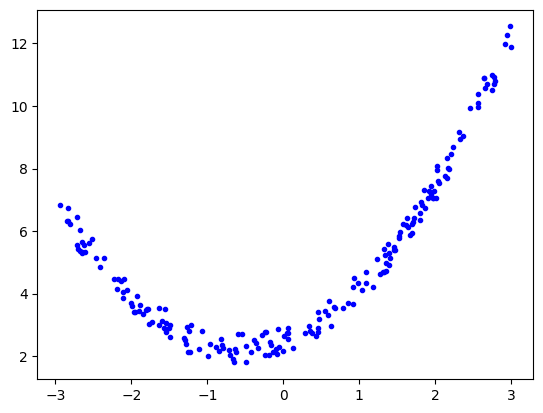

In [6]:
plt.plot(X, y, 'b. ')

# plt.scatter(X, y)

In [7]:
# Train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [8]:
# Applying Linear Regression

model_1 = LinearRegression()
model_2 = SGDRegressor()

model_1.fit(X_train, y_train)
model_2.fit(X_train, y_train)

y_hat_1 = model_1.predict(X_test)
y_hat_2 = model_2.predict(X_test)

print(f"Model 1 r2 Score : {r2_score(y_test, y_hat_1)} \n")
print(f"Model 2 r2 Score : {r2_score(y_test, y_hat_2)} \n")

Model 1 r2 Score : 0.4388879931515586 

Model 2 r2 Score : 0.444639752413476 



C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


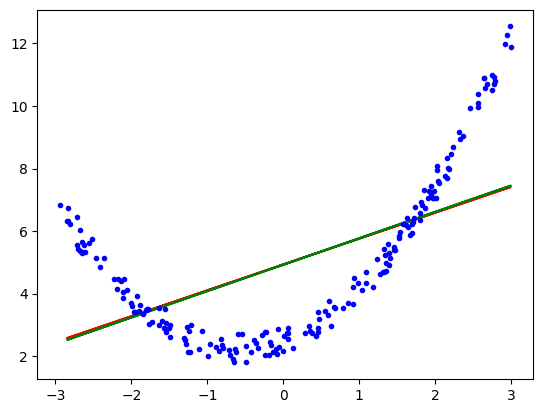

In [9]:
plt.plot(X_train, model_1.predict(X_train), color='red')
plt.plot(X_train, model_2.predict(X_train), color='green')

plt.plot(X, y, "b. ")

In [10]:
# Applying Polynomial Linear Regression

poly = PolynomialFeatures(degree=2, include_bias=True)

X_train_trans = poly.fit_transform(X_train) # Converting X_train
X_test_trans = poly.fit_transform(X_test) # Converting X_test

In [11]:
print(f"X_train Shape : {X_train.shape} \n")
print(f"X_train_trans Shape : {X_train_trans.shape}")

X_train Shape : (160, 1) 

X_train_trans Shape : (160, 3)


In [16]:
model = LinearRegression()

model.fit(X_train_trans, y_train)


print(f"Coef : {model.coef_} \n")
# coef : [[ X0, X1, X2 ..... Xn ]]

print(f"intercept : {model.intercept_} \n")

y_hat = model.predict(X_test_trans)
print(f"r2 score : {r2_score(y_test, y_hat)}")

Coef : [[0.         0.89942061 0.79129606]] 

intercept : [2.48486705] 

r2 score : 0.9934092926140141


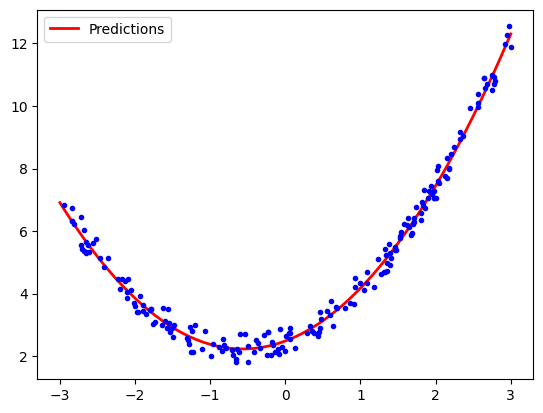

In [45]:
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = model.predict(X_new_poly)


plt.plot(X_new, y_new, "red", linewidth=2, label="Predictions")
plt.plot(X, y, 'b.')
plt.legend()
plt.show()